## Bisection method

#### Initiallizing : Clear all global variables if there are remaining variables in the previous work
##### Test for cloning repo

In [ ]:
# Initiallizing : Clear all global variables if there are remaining variables in the previous work
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]

#### Import modules~

In [12]:
# Import modules
import os, sys, time, numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy as sp, scipy.optimize as opt

### About a function to find a root

#### function 1 : $x^2 - 4x - lnx$
Interval 1 : $[1; 2]$ <br>
Inverval 2 : $[2; 4]$

root 1 = 1.412391172025309, root 2 = 3.057103549994281


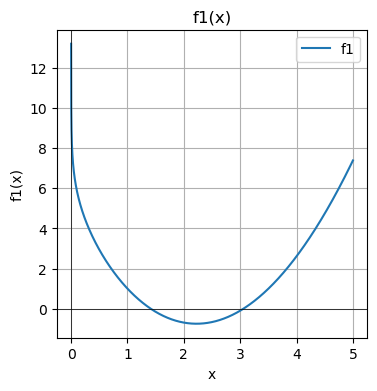

In [13]:
f1 = lambda x : np.power(x, 2) - 4*x + 4 - np.log(x)

############## Roots of function 1 ##############
interval_f1_1 = [1, 2]
interval_f1_2 = [2, 4]

r_interval_f1_1 = opt.root_scalar(f=f1, method='bisect', bracket=interval_f1_1)
r_f1_1 = r_interval_f1_1.root

r_interval_f1_2 = opt.root_scalar(f=f1, method='bisect', bracket=interval_f1_2)
r_f1_2 = r_interval_f1_2.root

print(f'root 1 = {r_f1_1}, root 2 = {r_f1_2}')

############## Plot function 1 ##############
figures, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
x = np.arange(.0001, 5+.0001, .0001)
y = f1(x)
axes.plot(x, y, label='f1')
axes.set_title('f1(x)')
axes.set_xlabel('x')
axes.set_ylabel('f1(x)')
axes.legend()
axes.axhline(y=0, linewidth=0.5, color='k')
axes.axvline(x=0, linewidth=0.5, color='k')
axes.grid()

#### function 2 : $x + 1 - 2sin(pi*x)$
interval 1 : $[0; 0.5]$ <br>
interval 2 : $[0.5; 1]$

root 1 = 0.20603511957051523, root 2 = 0.6819748087382322


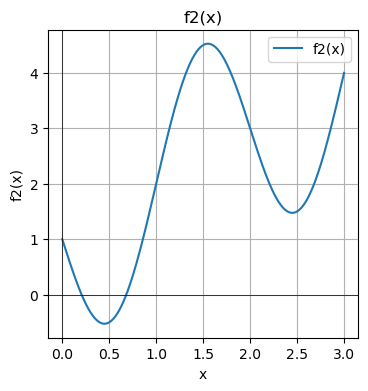

In [14]:
f2 = lambda x : x + 1 - 2*np.sin(np.pi*x)

############## Roots of function 2 ##############
interval_f2_1 = [0, .5]; x0_f2_1 = interval_f2_1[0]
interval_f2_2 = [.5, 1]; x0_f2_2 = interval_f2_2[0]

r_interval_f2_1 = opt.root_scalar(f=f2, method='bisect', bracket=interval_f2_1)
r_f2_1 = r_interval_f2_1.root

r_interval_f2_2 = opt.root_scalar(f=f2, method='bisect', bracket=interval_f2_2)
r_f2_2 = r_interval_f2_2.root

print(f'root 1 = {r_f2_1}, root 2 = {r_f2_2}')

############## Plot of function 2 ##############
figures1, axes1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
x = np.arange(.0001, 3+.0001, .0001)
y = f2(x)
axes1.plot(x, y, label='f2(x)')
axes1.set_title('f2(x)')
axes1.set_xlabel('x')
axes1.set_ylabel('f2(x)')
axes1.legend()
axes1.axhline(y=0, linewidth=.5, color='k')
axes1.axvline(x=0, linewidth=.5, color='k')
axes1.grid()

#### Method test

In [15]:
# tol = 1e-5

# a0 = interval[0]
# b0 = interval[1]

# if f(a0)*f(b0) < 0:
#     a_new = a0
#     b_new = b0
#     k = 0
#     err = np.abs(b_new - a_new)
#     while err > tol:
#         k = k + 1
#         a_old = a_new
#         b_old = b_new
#         mid = .5*(a_old + b_old)
#         f_a_old = f(a_old)
#         f_b_old = f(b_old)
#         f_mid = f(mid)
#         if f_mid == 0:
#             err = 0
#             print(f"At {k:d}-th iteration : The root of which function value is exactly zero is acquired so iteration ends ! ")
#             break
#         sign_w_a = f_mid*f_a_old
#         sign_w_b = f_mid*f_b_old
#         # if (sign_w_a < 0) & (sign_w_b < 0): ... 애초에 일어날 수 없는 경우임. 둘 다 양수가 나오는 것도 마찬가지임
#         #     print(f"There are at least two roots between {a_old}, {mid} and {mid}, {b_old} !")
#         #     print("Try new initial bracket for unimodality !")
#             # break
#         if (sign_w_a < 0) & (sign_w_b > 0):
#             b_new = mid
#             a_new = a_old
#         elif (sign_w_a > 0) & (sign_w_b < 0):
#             a_new = mid
#             b_new = b_old
#         err = abs(a_new - b_new)
#         print(f"At {k:d}-th iteration : a_new, b_new of interval are {a_new:.6f}, {b_new:.6f} and the interval length is {err:.6f}")
#     if f_mid == 0:
#         r = mid
#         print(f"Converged to Exact Root. {k:d}-th iteration / r = {r:.6f} / f(r) = {f(r):.6f}")
#     else:
#         r = .5*(a_new + b_new)
#         print(f"Converged by Tolerance. {k:d}-th iteration / r = {r:.6f} / f(r) = {f(r):.6f} / length_interval = {err:.6f}")
# else:
#     print(f"f(a0)*f(b0) is positive. There may not be root in [{a0}; {b0}]. Try another bracket !")

#### Define a method

In [ ]:
def bisection(func, a0, b0, tol): # arg : root 찾으려는 함수 / interval / error tolerance
    
    if func(a0)*func(b0) < 0: # Initial interval check
        list_k, list_r, list_f = [0], [a0], [func(a0)] # Log 초기화
        a_new = a0 # a_k 초기화
        b_new = b0 # b_k 초기화
        k = 0 # iteration number 초기화
        err = np.abs(b_new - a_new) # interval length 초기화
        
        # Iteration Loop 시작
        while err > tol: # interval length가 error tolerance보다 작아지면 iteration 종료
            k = k + 1; list_k.append(k) # Iteration number update
            a_old = a_new # a_k
            b_old = b_new # b_k
            mid = .5*(a_old + b_old); list_r.append(mid) # Evaluate new point m_k
            f_a_old = func(a_old)
            f_b_old = func(b_old)
            f_mid = func(mid); list_f.append(np.abs(f_mid))
            if f_mid == 0: # New point에서 정확히 eqn을 만족할 경우 즉시 iteration 종료
                err = 0
                print(f"At {k:d}-th iteration : The root of which function value is exactly zero is acquired so iteration ends ! ")
                break
            sign_w_a = f_mid*f_a_old # f(a_k)*f(m_k) 값
            sign_w_b = f_mid*f_b_old # f(a_k)*f(m_k) 값
            if (sign_w_a < 0) & (sign_w_b > 0): # a_k에서의 값과의 곱이 음수면 m_k는 b_k+1가 됨으로써 새 interval(a_k+1; b_k+1) 구해짐
                b_new = mid
                a_new = a_old
            elif (sign_w_a > 0) & (sign_w_b < 0): # b_k에서의 값과의 곱이 음수면 m_k는 a_k+1가 됨으로써 새 interval(a_k+1; b_k+1) 구해짐
                a_new = mid
                b_new = b_old
            err = abs(a_new - b_new) # 새 interval length 계산
            print(f"At {k:d}-th iteration : a_new, b_new of interval are {a_new:.6f}, {b_new:.6f} and the interval length is {err:.6f}")

        if f_mid == 0:
            r = mid
            print(f"Converged to Exact Root. {k:d}-th iteration / r = {r:.6f} / func(r) = {func(r):.6f}")
        else:
            r = .5*(a_new + b_new)
            print(f"Converged by Tolerance. {k:d}-th iteration / r = {r:.6f} / func(r) = {func(r):.6f} / length_interval = {err:.6f}")
        return r, np.array(list_k), np.array(list_r), np.array(list_f)
    else:
        print(f"f(a0)*f(b0) is positive. There may not be root in [{a0}; {b0}]. Try another bracket !")

#### Method implementation

##### Root를 찾을 function 및 구간 먼저 선정

In [17]:
######### function / interval setting #########
idx_case = 4
if idx_case == 1:
    f = f1
    a0 = interval_f1_1[0]
    b0 = interval_f1_1[1]
    r = r_f1_1
elif idx_case == 2:
    f = f1
    a0 = interval_f1_2[0]
    b0 = interval_f1_2[1]
    r = r_f1_2
elif idx_case == 3:
    f = f2
    a0 = interval_f2_1[0]
    b0 = interval_f2_1[1]
    r = r_f2_1
else:
    f = f2
    a0 = interval_f2_2[0]
    b0 = interval_f2_2[1]
    r = r_f2_2

#### function 및 구간 선정 후 method로 root finding

In [18]:
result = bisection(func=f, a0=a0, b0=b0, tol=1e-5)
result

At 1-th iteration : a_new, b_new of interval are 0.500000, 0.750000 and the interval length is 0.250000
At 2-th iteration : a_new, b_new of interval are 0.625000, 0.750000 and the interval length is 0.125000
At 3-th iteration : a_new, b_new of interval are 0.625000, 0.687500 and the interval length is 0.062500
At 4-th iteration : a_new, b_new of interval are 0.656250, 0.687500 and the interval length is 0.031250
At 5-th iteration : a_new, b_new of interval are 0.671875, 0.687500 and the interval length is 0.015625
At 6-th iteration : a_new, b_new of interval are 0.679688, 0.687500 and the interval length is 0.007812
At 7-th iteration : a_new, b_new of interval are 0.679688, 0.683594 and the interval length is 0.003906
At 8-th iteration : a_new, b_new of interval are 0.681641, 0.683594 and the interval length is 0.001953
At 9-th iteration : a_new, b_new of interval are 0.681641, 0.682617 and the interval length is 0.000977
At 10-th iteration : a_new, b_new of interval are 0.681641, 0.68

(0.6819725036621094,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 array([0.5       , 0.75      , 0.625     , 0.6875    , 0.65625   ,
        0.671875  , 0.6796875 , 0.68359375, 0.68164062, 0.68261719,
        0.68212891, 0.68188477, 0.68200684, 0.6819458 , 0.68197632,
        0.68196106, 0.68196869]),
 array([-5.00000000e-01,  3.35786438e-01,  2.22759065e-01,  2.45607754e-02,
         1.07592529e-01,  4.35822200e-02,  1.00196305e-02,  7.14433889e-03,
         1.46932987e-03,  2.82959911e-03,  6.78156309e-04,  3.96081604e-04,
         1.40913678e-04,  1.27614885e-04,  6.64166615e-06,  6.04885422e-05,
         2.69239212e-05]))

#### Error = r* - r

In [19]:
r_sequence = result[2]
err = np.abs(r_sequence - r)
err

array([1.81974809e-01, 6.80251913e-02, 5.69748087e-02, 5.52519126e-03,
       2.57248087e-02, 1.00998087e-02, 2.28730874e-03, 1.61894126e-03,
       3.34183738e-04, 6.42378762e-04, 1.54097512e-04, 9.00431132e-05,
       3.20271993e-05, 2.90079570e-05, 1.50962114e-06, 1.37491679e-05,
       6.11977339e-06])

#### Error vs Iteration Plot
Bisection method는 구간만 잘 정하면 그 구간 내 f(x) = 0이 되는 점을 무조건 잘 찾음

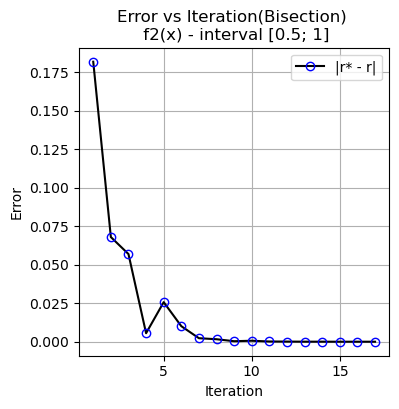

In [20]:
figures, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
axes.plot(np.arange(len(r_sequence))+1, err, 'o-', markerfacecolor='none', markeredgecolor='blue', color='black', label='|r* - r|')
axes.set_title(f'Error vs Iteration(Bisection) \n f{idx_case//3 + 1}(x) - interval [{a0}; {b0}]')
axes.set_xlabel('Iteration')
axes.set_ylabel('Error')
axes.legend()
axes.grid()